In [106]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

import re

In [ ]:
births = pd.read_csv('../data/raw/totSampDF18.csv')

#### Columns of interest  
Mom age C  
Mom’s age to first baby C  
Weeks born early starting at 35-40 M  
Avg BirthWeights M  
Multiple Births C  
Plurality C  
Method of Birth M  
Birth Place M  
BMI / Mom’s weight / weight gain M&C 


In [86]:
colnames = np.array(births.columns)
colnames

array(['Unnamed: 0', 'birth_year', 'birth_month', 'birth_time',
       'birth_day_of_wk', 'birth_place', 'mothers_age_imputed',
       'mothers_age', 'mothers_nativity', 'mothers_residence_status',
       'mothers_race', 'mothers_race_imputed', 'mothers_hispanic_origin',
       'mothers_hispanic_origin2', 'paternity_acknow',
       'mothers_marital_status', 'mothers_maristat_imputed',
       'mothers_education', 'fathers_age', 'fathers_race',
       'fathers_hispanic_origin', 'fathers_hispanic_origin2',
       'fathers_education', 'prior_living_births', 'prior_dead_births',
       'prior_terminations', 'mo_since_last_live_birth',
       'mo_since_last_other_birth', 'mo_prenatal_care_began',
       'n_prenatal_visits', 'wic', 'cigs_tri1', 'cigs_tri2', 'cigs_tri3',
       'mothers_height', 'mothers_bmi', 'pre_preg_lbs', 'delivery_lbs',
       'pre_preg_diab', 'gest_diab', 'pre_preg_hypten', 'gest_hypten',
       'hypten_ecl', 'prev_preterm_birth', 'infertility_treatment',
       'fertil_

## Baby weight time series

In [ ]:
babywt = births[['birth_year', 'birth_month','birth_time','birth_weight_gm']]


In [ ]:
meanwt_ts = babywt.groupby(['birth_year','birth_month'])['birth_weight_gm'].mean()

### Monthly Mean and Median birth weight by year

In [ ]:
plt.figure(figsize=(16,16))

meanwt_ts.plot()
# plt.xlabel('Number of cases of Plurality')
# plt.ylabel('Years based on amount of Twins')

In [ ]:
medwt_ts = babywt.groupby(['birth_year','birth_month'])['birth_weight_gm'].median()

In [ ]:
plt.figure(figsize=(16,16))
medwt_ts.plot()

### Yearly Mean and Median Birth weight 

In [ ]:
meanwt_ts2 = babywt.groupby(['birth_year'])['birth_weight_gm'].mean()

plt.figure(figsize=(16,16))
meanwt_ts2.plot()

In [ ]:
medwt_ts2 = babywt.groupby(['birth_year'])['birth_weight_gm'].median()

plt.figure(figsize=(16,16))
medwt_ts2.plot()

### Monthly variation in baby birth weight

In [ ]:
meanwt_ts3 = babywt.groupby(['birth_month'])['birth_weight_gm'].mean()

plt.figure(figsize=(16,16))
meanwt_ts3.plot()

In [ ]:
medwt_ts3 = babywt.groupby(['birth_month'])['birth_weight_gm'].median()

plt.figure(figsize=(16,16))
medwt_ts3.plot()

## Birth method 

In [ ]:
method  = (births[['birth_year', 'birth_month','final_delivery_method']])
# method.groupby('birth_year')

#Missingness
print(method['final_delivery_method'].value_counts())  #total missing 
print(method.groupby(['birth_year'])['final_delivery_method'].value_counts()) #missing per year


## Column cleaning  
Add to general cleaning file

In [ ]:
method2 = method.mask(method['final_delivery_method'] == ' ')
# method
# print('Masked method \n',method2['final_delivery_method'].value_counts())
# print('Unmasked method \n', method['final_delivery_method'].value_counts())
# births['final_delivery_method'] = pd.to_numeric(births['final_delivery_method'])
method2['final_delivery_method'] = method2['final_delivery_method'].astype(float)
method2.dtypes
method2.groupby(['birth_year'])['final_delivery_method'].value_counts()

In [ ]:
methodplt = method2.groupby(['birth_year'])['final_delivery_method'].value_counts()
methodplt.unstack().plot(logy = True, legend = False)

In [ ]:
methodplt = method2.groupby(['birth_month'])['final_delivery_method'].value_counts()
methodplt.unstack().plot(logy = True, legend = False)

In [ ]:
methodplt = method2.groupby(['birth_year','birth_month'])['final_delivery_method'].value_counts()
methodplt.unstack().plot(logy = True, legend = False)

## Place of birth trend

In [ ]:
place = (births[['birth_year', 'birth_month','birth_place']])

In [ ]:
print(place['birth_place'].value_counts()) #289573 missing
print(place.groupby(['birth_year'])['birth_place'].value_counts()) #missing per year

In [ ]:
place2 = place.mask(place['birth_place'] == ' ')
# place2
# print('Masked place \n', place2['birth_place'].value_counts())
place2['birth_place'] = place2['birth_place'].astype(float)
# method2.dtypes
place2.groupby(['birth_year'])['birth_place'].value_counts()

In [ ]:
placeplt = place2.groupby(['birth_year'])['birth_place'].value_counts()
placeplt.unstack().plot(logy = True, legend = False)

## Useful functions


In [ ]:
print("Value counts of %s \n" %('birth_place'), place['birth_place'].value_counts(), )

In [ ]:
#check column for missing observations and look at distribution of value

def val_check(col):
    col = str(col)
    print( "Value counts of %s \n" %(col), births[col].value_counts())
    print("Value counts of %s by year \n" %(col), births.groupby(['birth_year'])[col].value_counts())

In [ ]:
val_check('birth_place')

## NICU admissions


In [ ]:
val_check(births, 'admit_NICU')

In [ ]:
births['mothers_age_groups']= pd.cut(births['mothers_age'], 4, labels = ['12-19', '20-29', '30-39','40-50'])

In [ ]:
births['admit_NICU'] = births['admit_NICU'].replace(' ', 'U')

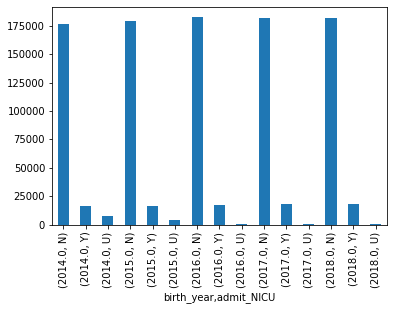

In [78]:
births.groupby('birth_year')['admit_NICU'].value_counts().plot(kind='bar')

<Figure size 1440x1440 with 0 Axes>

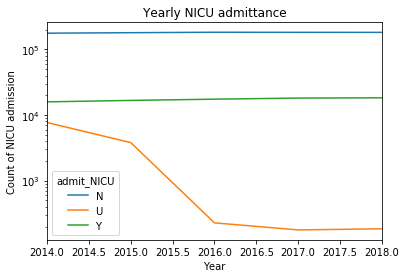

In [79]:
plot_gpYR(births,'admit_NICU',"Year","Count of NICU admission", "Yearly NICU admittance",kind='line')

In [ ]:
births['admit_NICU' != 'U'].admit_NICU.value_counts().plot(kind = 'pie', autopct='%1.1f%%', pctdistance = 1.4)
title = ' '
#dfNo13 = totDF.loc[totDF['birth_year'] != 2013.0]


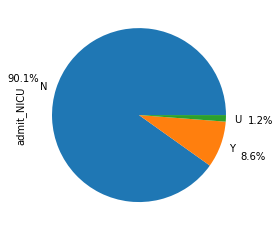

In [73]:
births['admit_NICU'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', pctdistance = 1.4)


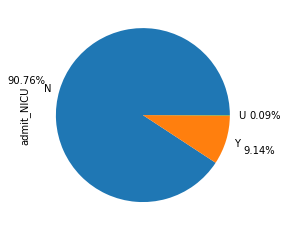

In [77]:
test = births.loc[births['birth_year']==2018]
test['admit_NICU'].value_counts().plot(kind = 'pie', autopct='%1.2f%%', pctdistance = 1.4)


### Mother health factors
##### BMI and AGE

In [110]:
#births['mothers_bmi'] = births['mothers_bmi'].replace('      ',0.0)
births['mothers_bmi'] = pd.to_numeric(births['mothers_bmi'], errors = 'coerce')
#births['mothers_bmi'] = births['mothers_bmi'].astype(float)


In [112]:
births['mother_bmi_recode'] = pd.cut(births['mothers_bmi'],[19.0, 25.0,30.0,35.0,40.0,90.0], right = False)

In [113]:
val_check(births,'mother_bmi_recode')

Value counts of mother_bmi_recode 
 [19.0, 25.0)    406668
[25.0, 30.0)    249859
[30.0, 35.0)    138405
[35.0, 40.0)     67308
[40.0, 90.0)     47292
Name: mother_bmi_recode, dtype: int64
Value counts of mother_bmi_recode by year 
 birth_year  mother_bmi_recode
2014.0      [19.0, 25.0)         81296
            [25.0, 30.0)         47536
            [30.0, 35.0)         25535
            [35.0, 40.0)         12184
            [40.0, 90.0)          8348
2015.0      [19.0, 25.0)         82205
            [25.0, 30.0)         49102
            [30.0, 35.0)         26742
            [35.0, 40.0)         12904
            [40.0, 90.0)          8772
2016.0      [19.0, 25.0)         82833
            [25.0, 30.0)         50674
            [30.0, 35.0)         27798
            [35.0, 40.0)         13173
            [40.0, 90.0)          9689
2017.0      [19.0, 25.0)         81084
            [25.0, 30.0)         51141
            [30.0, 35.0)         28671
            [35.0, 40.0)         14

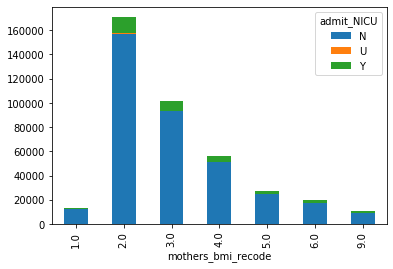

In [135]:
testdf = births.groupby(['mothers_bmi_recode'])['admit_NICU'].value_counts().unstack()
testdf.plot(kind = 'bar', stacked = True)

ValueError: operands could not be broadcast together with shapes (1000000,) (21,) 

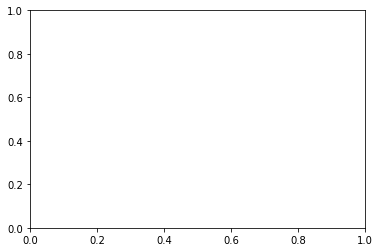

In [130]:
df2 = df.groupby(['Name', 'Abuse/NFF'])['Name'].count().unstack('Abuse/NFF').fillna(0)
df2[['abuse','nff']].plot(kind='bar', stacked=True)

<Figure size 1440x1440 with 0 Axes>

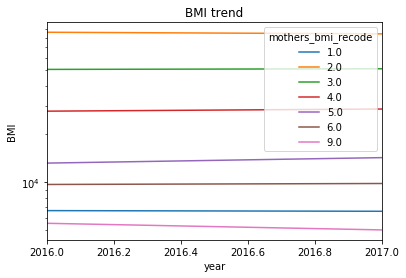

In [118]:
plot_gpYR(births,'mothers_bmi_recode','year','BMI', 'BMI trend')

In [ ]:
def val_check(data_frame, column_name = str):
    df = pd.DataFrame(data_frame)
    col = column_name
    print( "Value counts of %s \n" %(col), df[col].value_counts())
    print("Value counts of %s by year \n" %(col), df.groupby(['birth_year'])[col].value_counts())

## Testing helper functions

In [ ]:

def plotter(col):
    df[col].groupby(df['year'])[col].value.counts()
    col.plot(logy=True, legend = False
    xlabel
    ylabel
             

In [ ]:
def map_plot(df):
    map(lamba col: plotter(col), col in df)

In [ ]:
def plot_gpYR(df,col,xlab,ylab,title,kind='line'):
    groupDF = df.groupby('birth_year')[col].value_counts().unstack()
    plt.figure(figsize=(20,20))
    groupDF.plot(kind=kind,logy=True, legend=True)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    return